# Module 3 -  Structured Data

In this module, we are going to learn how to manipulate structured data in a real world scenario using the Data Analytics Cycle that you learned in previous sessions. 



## Learning about Organisations with Structured Data: Why are people leaving my company?

Case studies help students learn by immersing them in a real world business scenario where they act as problem solvers and decision-makers.

A case study must not merely summarize the case. It should identify **key features** and **key problems**. And also **outline** and **assess** alternative courses of action to deal with the problem you identify.


In this module, we are going to analyse a structured dataset with information about human resources of a company.


### BUSINESS CONCERN: Understand why the best and most experienced employees leaving the company.

In [21]:
import pandas as pd    # used for data manipulation and data analysis
import numpy as np     # used for algebraic operations               

import matplotlib.pyplot as plt  # used for visualisations
import seaborn as sns            # used for visualisations

pd.set_option('display.max_rows', 250)  # maximum number of rows to display in a dataframe
#pd.options.display.max_rows            # prints the maximum number of rows to display in a dataframe

This block of code uses HTML to align the DATASET INFORMATION table to the left

In [22]:
%%html 
<style>
table {float:left} 
</style>

### DATASET INFORMATION

The Human Resources department of the company has collected the following information about the staff members

| Variable              | Descriptions                                |
|-----------------------|---------------------------------------------|
| satisfaction_level    | Satisfaction Level                          |
| last_evaluation       | Last evaluation                             |
| number_project        | Number of projects                          |
| average_montly_hours  | Average monthly hours                       |
| time_spend_company    | Time spent at the company                   |
| Work_accident         | Whether they have had a work accident       |
| left                  | Whether the employee has left               |
| promotion_last_5years | Whether had a promotion in the last 5 years |
| department            | department                                  |
| salary                | Salary                                      |

### Taking a look at the dataset

In [29]:
# dataset filepath
dataset_path = "data/dataset_week4.csv"

# load dataset into a dataframe
data = pd.read_csv( dataset_path )
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Take a look at the "salary" column. A machine cannot understand what "low", "medium" or "high" mean. These are terms for our human understanding. We will need to encode this representation into numbers (also called integers).
The variable "Salary" is called a categorical variable, because it expresses the categories "low", "medium" and "high".

In [30]:
# how many categories of salary do we have?

np.unique(data['salary']) # the unique function removes all duplicates from a list

array(['high', 'low', 'medium'], dtype=object)

In [32]:
data.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [35]:
# encoding categorical variables
# we are going to map the attributes "low", "medium", and "high" of the "salary" column to 0, 1, and 2, respectively
# and put the results in a new column "salary_enc"
data['salary_enc'] = data.salary.map({"low": 0, "medium": 1, "high": 2})
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_enc
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0


In [36]:
# how many categories of salary do we have?
np.unique(data['salary_enc'])

array([0, 1, 2])

The first step that we need to do when analysing structured data is to clean up the data. In other words, to look for:
- missing
- incomplete or 
- noisy values.

In [37]:
# check if there are null (missing) entries in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_enc             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


Dataset is complete and it does not have any missing values. 

### Performing Descriptive Statistics

A descriptive statistic is a summary and a quantitative analysis that describes or summarizes features from a dataset.

Pandas has a descriptive statistics method, **describe**, that summarize the central tendency, dispersion and shape of the dataset. 


In [38]:
# descriptive statistics
descr = data.describe()
descr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_enc
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [53]:
# average number of employees who left
employees_who_left = np.round(descr['left']['mean'],2)

# average satisfaction level
satisfaction_lv = np.round(descr['satisfaction_level']['mean'],2)

# average performance level
performance_lv = np.round(descr['last_evaluation']['mean'],2)

# average performance level
projects = np.round(descr['number_project']['mean'])

# average performance level
num_hours = np.round(descr['average_montly_hours']['mean'])

In [54]:
print("Summary of Descriptive Statistics:\n")
print("\tAverage percentage of exployees leaving the company: %.2f%%;" %(employees_who_left))
print("\tAverage satisfaction level amongst employees: %.2f%%;" %(satisfaction_lv))
print("\tAverage performance level of employees: %.2f%%;" %(performance_lv))
print("\tEmployees work on average on %d projects and spend %d hours\n" %(projects, num_hours))

Summary of Descriptive Statistics:

	Average percentage of exployees leaving the company: 0.24%;
	Average satisfaction level amongst employees: 0.61%;
	Average performance level of employees: 0.72%;
	Employees work on average on 4 projects and spend 201 hours



#### Graphical Representation of Descriptive Statistics: Box Plots

Boxplot is a good statistical graphic to analyze the dataset and indentify outliers. An outlier is as observation that lies an abnormal distance from other values. In this case, the data analyst has to decide what is considered abnormal according to a certain data distribution.


/Users/catarina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/catarina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/catarina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/catarina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/catarina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(sing

<AxesSubplot:xlabel='time_spend_company'>

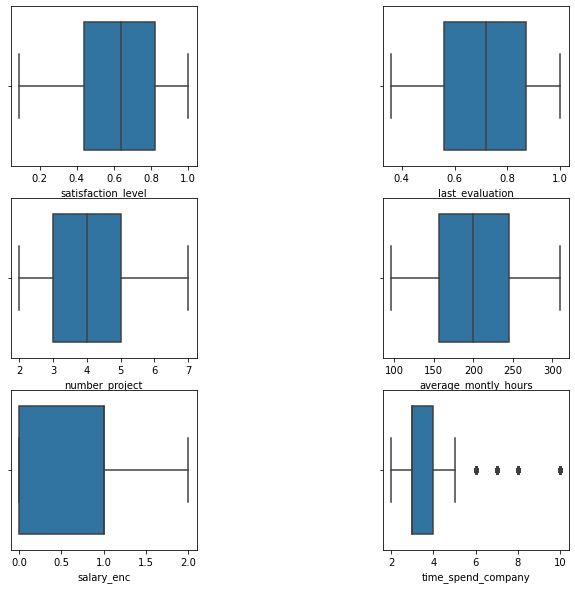

In [59]:
f, axes = plt.subplots(3,2, figsize=(10,10))

plt.subplots_adjust(wspace=1) # adjust the space between the plots

# plot a boxplot of satisfaction_level to see if there is outliers
sns.boxplot( x= 'satisfaction_level',  data=data, orient='v', ax=axes[0,0])

# plot a boxplot of last_evaluation to see if there is outliers
sns.boxplot( x= 'last_evaluation',  data=data, orient='v',ax=axes[0,1])

# plot a boxplot of number_project to see if there is outliers
sns.boxplot( x= 'number_project',  data=data, orient='v',ax=axes[1,0])

# plot a boxplot of average_montly_hours to see if there is outliers
sns.boxplot( x= 'average_montly_hours',  data=data, orient='v',ax=axes[1,1])

# plot a boxplot of salary to see if there is outliers
sns.boxplot( x= 'salary_enc',  data=data, orient='v',ax=axes[2,0])

# plot a boxplot of time_spend_company to see if there is outliers
sns.boxplot( x= 'time_spend_company',  data=data, orient='v',ax=axes[2,1])


We can see the graphical representation of our analysis in terms of data distributions:

- Satisfaction level and Last evaluation (performance) has a skewed left (negative) ditribuitions.
- Number of projects has a skewed right(positive) ditribution.
- Average monthly hours has a simetric ditribution.
- Analyse de distribution of the variables is important due the fact that many statistical tests assume normal distribution


#### How Many Departments Does Our Organisation Have?

In [ ]:
data_by_dept = data[['department','left']].groupby('department', sort=True).count()
data_by_dept

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axes[0].pie(data_by_dept.values,
        labels=data_by_dept.index,
        shadow=True,
        colors = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50'],
        explode=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) # to separate the "slices"
axes[0].set_title('Distribution of the number of employees who left according to the different sectors\n\n')
axes[0].axis("equal")

axes[1].bar(x = data_by_dept.index.to_list(), height = sum(data_by_dept.values.tolist(),[]))
fig.tight_layout()


#### How many employees per salary range?

In [ ]:
counts_per_salary = data['salary'].value_counts()
total = sum(counts_per_salary)

print("There are:\n")
print("%d employees with a Low Salary which represents %.2f%% of the employees" %(counts_per_salary[0], np.round(counts_per_salary[0]/total,2) ))
print("%d employees with a Medium Salary which represents %.2f%% of the employees" %(counts_per_salary[1], np.round(counts_per_salary[1]/total,2) ))
print("%d employees with a High Salary which represents %.2f%% of the employees" %(counts_per_salary[2], np.round(counts_per_salary[2]/total,2) ))

#### How many employees per salary range and per department?

In [ ]:
table = data.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table

In [ ]:
table.plot(kind="bar", figsize=(10,6), title="Employees per department and per salary range")

#### Correlation Analysis

The correlation is a very useful statitiscal analysis that describes the degree of relationship between two variables. They can be of two types:
- positive correlation: two variables move in the same direction
- negative correlation: two variables move in oposite directions

In [ ]:
correlation_matrix = data.corr()
correlation_matrix

The correlation matrix shows that

- Negative correlation of (-0.39) between **satisfaction_level** and the employees that **left** the company. This means that the majority of the emplyees who left were highly unsatisfied with the company.
- The highest positive correlation is between **number of projects** and **average monthly hours** (0.42). This means the more hours spent, the more projects the employee was working on.
- **Last_evaluation** is highly correlated to **number_project**(0.35)and **average_monthly_hours**(0.34). This means that the more hours and projects an employee worked on, the higher was his evaluation.
- **salary** (-0.16) with employees that **left**. This means that employees who left felt underpaid.

In [ ]:
sns.set(style='white')

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

#### Hypothesis 1: Employess who leave it is because of the salary

In [ ]:
j = sns.factorplot(x='salary', y='left', kind='bar', data=data)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low']);

In [ ]:
# Employees who left by salary range and department
table_leave = data[data['left']==1].pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table_leave

In [ ]:
table_leave.plot(kind="bar", figsize=(10,6), title="Employees who left per department and per salary range")

In [ ]:
# Employees who stayed by salary range and department
table_stay = data[data['left']==0].pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table_stay

In [ ]:
table_stay.plot(kind="bar", figsize=(10,6), title="Employees who stayed per department and per salary range")

The analysis shows that:
- the majority of the employees who had a low salary left
- the sales department had the highest number of emplyees leaving. However, this is still not enough to draw a conclusion. Many employees with low salary also stayed in the company
- the technical and support departments also pay a low salary range to its employees, which might be another reason why they are leaving

#### Hypothesis 2: Employees who are not satisfied tend to leave the company

In [ ]:
figure(figsize=(10,6))

bins = np.linspace(0.006,1.000, 15)
    
n, b, patches = plt.hist(data[(data['left']==1) ]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left', color = "skyblue")
patches[8].set_fc('r') #average satisfaction
n, b, patches = plt.hist(data[(data['left']==0) ]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed', color = "green")
patches[8].set_fc('r')  #average satisfaction
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

It is possible to see 3 interesting peaks in the satisfaction levels of the employees that left the company.

- We have a peak of employees who are totally disappointed.
- Another peak at 0.4, representing another group with the satisfaction level below the average.
- And another amount in the range 0.7 and 0.9, with employees that left, although the high satisfaction (probably because they wanted to progree in the career in another job)

#### When did the employees start to feel unsatisfied?

Are the employees working too much?

In [ ]:
sns.set()

ax = sns.factorplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=4, size=3, color='blue',sharex=False, data=data)
ax.set_xlabels('Number of Projects');

Results show a clear drop in satisfaction when employees are working on 6 or more projects (overworking...)

#### Why are the most valuable employees leaving the company? To be continued in the tutorial!

### Interactive Discussion: Strengths and Weaknesses

Please go to http://www.wooclap.com/IAB303 and add some **Strengths** and **Weaknesses** that you think are related to this business concern